# Looking at internal connectivity

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('../')
from lib.Dab import Dab, get_linear_weights
from lib.Gmt import read_gmt

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import scipy.stats
import igraph

from lib.clustering import *

In [2]:
connectivity_results = pd.DataFrame.from_csv("connectivity_all.tsv", sep='\t', index_col=None)

In [12]:
connectivity_results = pd.DataFrame.from_csv("connectivity_gocc.tsv", sep='\t', index_col=None)

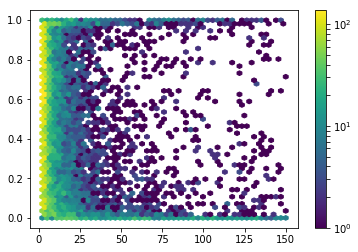

In [14]:
f = connectivity_results[(connectivity_results.transform == "Cosine") &
                         (connectivity_results.test_case == "GO CC 2600 large")]
plt.hexbin(f['size'], (1-f['experimental_pval']), mincnt=1, norm=LogNorm(), gridsize=50)
plt.colorbar()
plt.show()

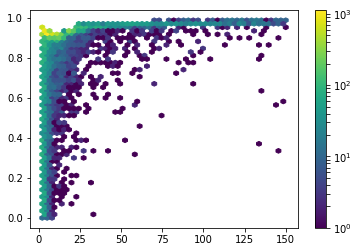

In [15]:
f = connectivity_results[(connectivity_results.transform == "None") &
                         (connectivity_results.test_case == "GO CC 2600 large")]
plt.hexbin(f['size'], (1-f['experimental_pval']), mincnt=1, norm=LogNorm(), gridsize=50)
plt.colorbar()
plt.show()

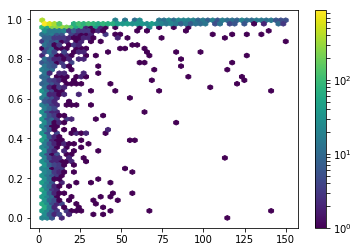

In [10]:
f = connectivity_results[(connectivity_results.transform == "None")]
plt.hexbin(f['size'], (1-f['experimental_pval']), mincnt=1, norm=LogNorm(), gridsize=50)
plt.colorbar()
plt.show()

In [30]:
grouped = connectivity_results.groupby(['test_case', 'test_number', 'transform'])
aggregates = []
for labels, f in grouped:
    n = len(f)
    pval_cutoff = 0.05/n
    number_significant = len(f[f.calculated_pval < pval_cutoff])
    number_experimental_significant = len(f[f.experimental_pval < 0.01])
    fraction_significant = number_significant / float(n)
    fraction_experimental_significant = number_experimental_significant / float(n)
    aggregates.append(labels + (n, number_significant, number_experimental_significant, 
                                fraction_significant, fraction_experimental_significant))
connectivity_summary = pd.DataFrame(aggregates, 
        columns=['test_case', 'test_number', 'transform','total_number', 'number_significant', 
                 'number_experimental_significant', 'fraction_significant', 
                 'fraction_experimental_significant'])   

In [31]:
connectivity_summary.sort_values(['transform'])[['transform', 'number_significant', 'number_experimental_significant']]

transform  number_significant  number_experimental_significant
0                Cosine                   0                               10
1           Cutoff(0.1)                1479                              547
2             Cutoff(1)                3387                                0
3            Cutoff(10)                5290                                0
4            Cutoff(20)                4589                              168
5             Cutoff(5)                5031                                0
6               KNN(10)                3028                                0
7              KNN(100)                5338                               22
8             KNN(1000)                4948                               65
9              KNN(250)                5280                               16
10              KNN(50)                4700                               23
11             KNN(500)                5081                               73
12                  Log                4680                                6
13                 None                4599                               98
14              Pearson                 214                              167
15             Spearman                 835                             2029
16  Topological Overlap                2134                                9

In [12]:
connectivity_results = pd.DataFrame.from_csv("connectivity_random.tsv", sep='\t', index_col=None)

In [13]:
grouped = connectivity_results.groupby(['test_case', 'test_number', 'transform'])
aggregates = []
for labels, f in grouped:
    n = len(f)
    pval_cutoff = 0.05/n
    number_significant = len(f[f.calculated_pval < pval_cutoff])
    number_experimental_significant = len(f[f.experimental_pval < 0.01])
    fraction_significant = number_significant / float(n)
    fraction_experimental_significant = number_experimental_significant / float(n)
    aggregates.append(labels + (n, number_significant, number_experimental_significant, 
                                fraction_significant, fraction_experimental_significant))
connectivity_summary = pd.DataFrame(aggregates, 
        columns=['test_case', 'test_number', 'transform','total_number', 'number_significant', 
                 'number_experimental_significant', 'fraction_significant', 
                 'fraction_experimental_significant'])

In [19]:
f = connectivity_summary.groupby(['test_case','transform'], as_index=False).agg(np.mean)

In [20]:
pd.pivot_table(f, values='number_experimental_significant', columns='test_case', index='transform')

test_case            100 Random Genes  1000 Random Genes  2600 Random Genes  \
transform                                                                     
Cosine                            0.0                0.0                0.8   
Cutoff(0.1)                      18.0              126.6              188.6   
Cutoff(1)                         4.8               64.6                0.0   
Cutoff(10)                        0.0                0.6                0.4   
Cutoff(20)                        0.0                6.2               31.8   
Cutoff(5)                         0.0                0.2                0.6   
KNN(10)                           0.0                9.6               15.8   
KNN(100)                          NaN                9.8               10.0   
KNN(1000)                         NaN                NaN              691.4   
KNN(250)                          NaN              126.0               25.0   
KNN(50)                          15.0                4.4               16.4   
KNN(500)                          NaN              215.2              127.6   
Log                               4.0                0.0                0.6   
None                              0.0               30.4               34.2   
Pearson                           1.2                7.6               14.8   
Spearman                          1.4              171.8              448.8   
Topological Overlap               4.6                1.0                3.0   

test_case            500 Random Genes  
transform                              
Cosine                            0.4  
Cutoff(0.1)                      59.4  
Cutoff(1)                        37.6  
Cutoff(10)                        0.0  
Cutoff(20)                        7.4  
Cutoff(5)                         0.2  
KNN(10)                           5.4  
KNN(100)                         37.8  
KNN(1000)                         NaN  
KNN(250)                        140.4  
KNN(50)                           6.4  
KNN(500)                          NaN  
Log                               0.0  
None                              1.8  
Pearson                           3.8  
Spearman                         73.2  
Topological Overlap               3.4

In [21]:
pd.pivot_table(f, values='number_significant', columns='test_case', index='transform')

test_case            100 Random Genes  1000 Random Genes  2600 Random Genes  \
transform                                                                     
Cosine                            0.0                0.0                0.0   
Cutoff(0.1)                       7.0              153.2              344.0   
Cutoff(1)                        44.0              450.8              949.0   
Cutoff(10)                       63.6              831.6             1609.6   
Cutoff(20)                       36.4              609.6             1228.4   
Cutoff(5)                        71.4              704.4             1475.8   
KNN(10)                           4.4              513.8             1029.8   
KNN(100)                          NaN              197.0             1553.0   
KNN(1000)                         NaN                NaN               96.6   
KNN(250)                          NaN                4.8              539.6   
KNN(50)                           1.0              713.8             1577.8   
KNN(500)                          NaN               68.0                9.6   
Log                              49.0              655.6             1247.4   
None                             45.6              612.2             1182.0   
Pearson                           0.2                6.0               28.0   
Spearman                          0.2               24.4               99.6   
Topological Overlap              44.4              502.4              763.6   

test_case            500 Random Genes  
transform                              
Cosine                            0.0  
Cutoff(0.1)                      64.6  
Cutoff(1)                       235.8  
Cutoff(10)                      430.2  
Cutoff(20)                      299.8  
Cutoff(5)                       380.2  
KNN(10)                         280.4  
KNN(100)                          2.2  
KNN(1000)                         NaN  
KNN(250)                         41.4  
KNN(50)                         120.6  
KNN(500)                          NaN  
Log                             336.6  
None                            319.6  
Pearson                           5.2  
Spearman                         17.6  
Topological Overlap             290.8

In [23]:
connectivity_results = pd.DataFrame.from_csv("connectivity_gobp.tsv", sep='\t', index_col=None)

grouped = connectivity_results.groupby(['test_case', 'test_number', 'transform'])
aggregates = []
for labels, f in grouped:
    n = len(f)
    pval_cutoff = 0.05/n
    number_significant = len(f[f.calculated_pval < pval_cutoff])
    number_experimental_significant = len(f[f.experimental_pval < 0.01])
    fraction_significant = number_significant / float(n)
    fraction_experimental_significant = number_experimental_significant / float(n)
    aggregates.append(labels + (n, number_significant, number_experimental_significant, 
                                fraction_significant, fraction_experimental_significant))
connectivity_summary = pd.DataFrame(aggregates, 
        columns=['test_case', 'test_number', 'transform','total_number', 'number_significant', 
                 'number_experimental_significant', 'fraction_significant', 
                 'fraction_experimental_significant'])

f = connectivity_summary.groupby(['test_case','transform'], as_index=False).agg(np.mean)

In [24]:
pd.pivot_table(f, values='number_experimental_significant', columns='test_case', index='transform')

test_case            GO BP 100 large  GO BP 100 medium  GO BP 100 small  \
transform                                                                 
Cosine                     26.666667         44.333333        18.333333   
Cutoff(0.1)                29.000000         49.000000        27.000000   
Cutoff(1)                   0.000000         14.000000        10.333333   
Cutoff(10)                  2.000000          5.000000         0.000000   
Cutoff(20)                  3.666667         10.000000         0.000000   
Cutoff(5)                   3.666667          0.333333         0.000000   
KNN(10)                    16.333333          7.000000         2.666667   
KNN(100)                         NaN               NaN              NaN   
KNN(1000)                        NaN               NaN              NaN   
KNN(250)                         NaN               NaN              NaN   
KNN(50)                    10.666667         33.000000         2.000000   
KNN(500)                         NaN               NaN              NaN   
Log                         0.000000          0.666667         0.000000   
None                        3.333333         11.000000         0.000000   
Pearson                    12.666667          9.333333         0.000000   
Spearman                   23.333333         47.000000        21.000000   
Topological Overlap        11.333333         33.333333         0.000000   

test_case            GO BP 1000 large  GO BP 1000 medium  GO BP 1000 small  \
transform                                                                    
Cosine                     144.000000         133.666667         81.666667   
Cutoff(0.1)                 83.666667         119.333333        196.000000   
Cutoff(1)                   23.000000           0.000000         82.333333   
Cutoff(10)                   0.000000           0.000000          3.333333   
Cutoff(20)                   1.333333           2.666667          4.333333   
Cutoff(5)                    0.000000           0.000000          0.000000   
KNN(10)                     31.333333           9.666667         10.333333   
KNN(100)                     3.666667           0.333333          0.666667   
KNN(1000)                         NaN                NaN               NaN   
KNN(250)                    45.666667          34.000000         16.666667   
KNN(50)                     14.000000          10.333333          8.333333   
KNN(500)                    35.000000          29.333333         20.666667   
Log                          0.000000           0.000000          0.000000   
None                         0.000000           0.666667          0.666667   
Pearson                      2.333333           0.333333          0.666667   
Spearman                    56.333333          43.333333         37.666667   
Topological Overlap          0.666667           0.333333          1.000000   

test_case            GO BP 2600 large  GO BP 2600 medium  GO BP 2600 small  \
transform                                                                    
Cosine                     214.000000         230.000000        249.000000   
Cutoff(0.1)                202.000000         181.333333        209.333333   
Cutoff(1)                   48.000000           0.000000          0.000000   
Cutoff(10)                   2.333333           3.000000          5.333333   
Cutoff(20)                   0.000000           1.666667          4.333333   
Cutoff(5)                    0.000000           0.666667          1.000000   
KNN(10)                     15.000000          12.000000          8.333333   
KNN(100)                    32.000000          28.666667         15.000000   
KNN(1000)                   26.666667          33.666667         37.000000   
KNN(250)                     4.666667           7.666667          0.000000   
KNN(50)                     17.666667          33.666667         12.333333   
KNN(500)                    46.000000          38.666667         42.666667   

In [25]:
pd.pivot_table(f, values='number_significant', columns='test_case', index='transform')

test_case            GO BP 100 large  GO BP 100 medium  GO BP 100 small  \
transform                                                                 
Cosine                     33.000000         93.000000        12.000000   
Cutoff(0.1)                33.666667         26.666667        14.333333   
Cutoff(1)                 164.666667        142.333333       106.333333   
Cutoff(10)                408.666667        293.333333       295.666667   
Cutoff(20)                454.000000        328.000000       284.666667   
Cutoff(5)                 349.666667        248.333333       183.333333   
KNN(10)                   265.666667        205.666667        94.000000   
KNN(100)                         NaN               NaN              NaN   
KNN(1000)                        NaN               NaN              NaN   
KNN(250)                         NaN               NaN              NaN   
KNN(50)                   104.000000        143.666667        97.333333   
KNN(500)                         NaN               NaN              NaN   
Log                       599.000000        469.000000       424.000000   
None                      590.333333        442.666667       397.666667   
Pearson                   208.000000        191.333333       125.333333   
Spearman                   49.333333        131.333333       103.000000   
Topological Overlap       419.666667        321.000000       317.000000   

test_case            GO BP 1000 large  GO BP 1000 medium  GO BP 1000 small  \
transform                                                                    
Cosine                     146.666667         149.666667         96.000000   
Cutoff(0.1)                111.666667         254.000000        265.333333   
Cutoff(1)                  367.333333         572.666667        816.333333   
Cutoff(10)                1051.000000        1168.666667       1671.000000   
Cutoff(20)                1035.000000        1163.333333       1656.000000   
Cutoff(5)                  792.666667         841.666667       1445.000000   
KNN(10)                    983.666667         935.333333       1079.333333   
KNN(100)                  1097.333333         980.666667       1113.333333   
KNN(1000)                         NaN                NaN               NaN   
KNN(250)                   838.000000         914.000000        976.000000   
KNN(50)                   1211.333333        1040.666667       1161.333333   
KNN(500)                   867.000000         831.000000        842.666667   
Log                       1216.000000        1379.333333       1968.666667   
None                      1296.333333        1402.666667       1965.666667   
Pearson                    997.666667         990.000000        982.333333   
Spearman                   892.666667         872.666667        891.000000   
Topological Overlap        587.666667         727.333333       1120.333333   

test_case            GO BP 2600 large  GO BP 2600 medium  GO BP 2600 small  \
transform                                                                    
Cosine                     179.333333         232.666667        193.000000   
Cutoff(0.1)                341.333333         440.000000        487.666667   
Cutoff(1)                  799.333333         925.666667       1325.666667   
Cutoff(10)                1776.000000        1780.333333       2347.333333   
Cutoff(20)                1728.666667        1738.000000       2451.333333   
Cutoff(5)                 1498.000000        1471.333333       2004.000000   
KNN(10)                   1549.000000        1419.666667       1676.666667   
KNN(100)                  1795.666667        1791.666667       2030.000000   
KNN(1000)                 1360.333333        1491.666667       1602.666667   
KNN(250)                  1479.000000        1536.666667       1815.333333   
KNN(50)                   1978.333333        1910.666667       2195.000000   
KNN(500)                  1321.333333        1381.000000       1754.666667   

In [26]:
connectivity_results = pd.DataFrame.from_csv("connectivity_gocc.tsv", sep='\t', index_col=None)

grouped = connectivity_results.groupby(['test_case', 'test_number', 'transform'])
aggregates = []
for labels, f in grouped:
    n = len(f)
    pval_cutoff = 0.05/n
    number_significant = len(f[f.calculated_pval < pval_cutoff])
    number_experimental_significant = len(f[f.experimental_pval < 0.01])
    fraction_significant = number_significant / float(n)
    fraction_experimental_significant = number_experimental_significant / float(n)
    aggregates.append(labels + (n, number_significant, number_experimental_significant, 
                                fraction_significant, fraction_experimental_significant))
connectivity_summary = pd.DataFrame(aggregates, 
        columns=['test_case', 'test_number', 'transform','total_number', 'number_significant', 
                 'number_experimental_significant', 'fraction_significant', 
                 'fraction_experimental_significant'])

f = connectivity_summary.groupby(['test_case','transform'], as_index=False).agg(np.mean)

In [27]:
pd.pivot_table(f, values='number_experimental_significant', columns='test_case', index='transform')

test_case            GO CC 100 large  GO CC 100 medium  GO CC 100 small  \
transform                                                                 
Cosine                     10.333333         16.666667        42.333333   
Cutoff(0.1)                16.000000         14.000000        22.333333   
Cutoff(1)                  33.333333          5.666667        18.000000   
Cutoff(10)                  0.333333          4.333333         0.000000   
Cutoff(20)                  1.333333          5.333333         0.000000   
Cutoff(5)                   0.666667          0.666667         0.333333   
KNN(10)                     6.333333         11.666667         1.666667   
KNN(100)                         NaN               NaN              NaN   
KNN(1000)                        NaN               NaN              NaN   
KNN(250)                         NaN               NaN              NaN   
KNN(50)                    13.333333          2.666667         4.666667   
KNN(500)                         NaN               NaN              NaN   
Log                         0.333333          1.000000         0.000000   
None                        0.666667          5.333333         0.000000   
Pearson                    12.333333          8.000000         1.000000   
Spearman                   15.333333          2.666667        10.000000   
Topological Overlap         5.333333         15.333333         0.333333   

test_case            GO CC 1000 large  GO CC 1000 medium  GO CC 1000 small  \
transform                                                                    
Cosine                      49.000000          94.666667         73.333333   
Cutoff(0.1)                117.333333          74.666667        140.000000   
Cutoff(1)                   78.000000           0.000000          0.333333   
Cutoff(10)                   4.666667           0.000000          1.666667   
Cutoff(20)                  10.333333           0.666667          2.000000   
Cutoff(5)                    3.000000           0.666667          1.000000   
KNN(10)                     21.333333           3.000000         36.666667   
KNN(100)                     6.000000           4.333333          8.000000   
KNN(1000)                         NaN                NaN               NaN   
KNN(250)                    82.333333          41.333333         42.333333   
KNN(50)                     12.000000           7.666667         19.333333   
KNN(500)                    25.333333          50.666667         30.000000   
Log                          0.000000           0.000000          0.000000   
None                         3.000000           0.000000          1.333333   
Pearson                      3.333333           0.000000          0.000000   
Spearman                    31.000000          59.666667         47.666667   
Topological Overlap         10.000000           6.000000          4.333333   

test_case            GO CC 2600 large  GO CC 500 large  GO CC 500 medium  \
transform                                                                  
Cosine                     102.666667        28.000000         97.333333   
Cutoff(0.1)                212.666667        72.666667         36.000000   
Cutoff(1)                    0.000000        35.000000         26.000000   
Cutoff(10)                   0.000000         6.666667          3.333333   
Cutoff(20)                   1.666667         9.000000          2.000000   
Cutoff(5)                    0.000000         2.666667          1.333333   
KNN(10)                     18.000000        14.333333         17.666667   
KNN(100)                    16.333333         5.333333          6.333333   
KNN(1000)                   35.000000              NaN               NaN   
KNN(250)                     5.000000        24.000000         14.666667   
KNN(50)                     22.666667         1.666667          2.666667   
KNN(500)                    96.666667              NaN               NaN   
Log                        

In [28]:
pd.pivot_table(f, values='number_significant', columns='test_case', index='transform')

test_case            GO CC 100 large  GO CC 100 medium  GO CC 100 small  \
transform                                                                 
Cosine                     17.000000         32.333333        78.000000   
Cutoff(0.1)                18.666667         16.333333        15.666667   
Cutoff(1)                  84.000000         72.000000       102.333333   
Cutoff(10)                204.333333        151.666667       212.333333   
Cutoff(20)                220.000000        151.666667       213.000000   
Cutoff(5)                 142.666667        119.000000       166.666667   
KNN(10)                    63.333333        118.000000       233.666667   
KNN(100)                         NaN               NaN              NaN   
KNN(1000)                        NaN               NaN              NaN   
KNN(250)                         NaN               NaN              NaN   
KNN(50)                    36.666667         99.000000       178.333333   
KNN(500)                         NaN               NaN              NaN   
Log                       343.333333        201.000000       263.000000   
None                      320.666667        204.000000       265.000000   
Pearson                    49.000000         86.333333       251.333333   
Spearman                   26.333333         90.333333       196.333333   
Topological Overlap       191.666667        173.666667       215.333333   

test_case            GO CC 1000 large  GO CC 1000 medium  GO CC 1000 small  \
transform                                                                    
Cosine                      36.333333         136.666667        187.333333   
Cutoff(0.1)                222.666667         192.333333        340.333333   
Cutoff(1)                  582.000000         467.333333        708.000000   
Cutoff(10)                1234.333333         954.333333       1188.000000   
Cutoff(20)                1200.333333         992.000000       1305.000000   
Cutoff(5)                  973.333333         826.666667       1006.666667   
KNN(10)                    822.666667         949.000000       1201.666667   
KNN(100)                   712.666667         823.000000        963.000000   
KNN(1000)                         NaN                NaN               NaN   
KNN(250)                   459.000000         734.666667        962.333333   
KNN(50)                    886.333333        1002.333333       1107.000000   
KNN(500)                   434.000000         621.000000        881.333333   
Log                       1359.000000        1157.666667       1602.000000   
None                      1362.000000        1196.666667       1555.333333   
Pearson                    591.333333         898.000000       1120.666667   
Spearman                   437.000000         663.000000        907.333333   
Topological Overlap        807.666667         563.666667        933.000000   

test_case            GO CC 2600 large  GO CC 500 large  GO CC 500 medium  \
transform                                                                  
Cosine                      64.666667        15.333333        146.666667   
Cutoff(0.1)                383.666667       138.000000        110.666667   
Cutoff(1)                 1064.666667       417.000000        197.333333   
Cutoff(10)                1953.000000       775.333333        399.000000   
Cutoff(20)                1924.666667       743.333333        471.333333   
Cutoff(5)                 1725.666667       645.333333        349.333333   
KNN(10)                   1239.000000       290.666667        525.333333   
KNN(100)                  1435.666667       233.333333        461.000000   
KNN(1000)                  787.000000              NaN               NaN   
KNN(250)                   987.666667       181.333333        384.666667   
KNN(50)                   1593.333333       287.000000        474.666667   
KNN(500)                   652.666667              NaN               NaN   
Log                       2

In [38]:
modularity_results = pd.DataFrame.from_csv("modularity_gobp.tsv", sep='\t', index_col=None)
grouped = modularity_results.groupby(['test_case', 'transform'], as_index=False).agg(np.mean)
pd.pivot_table(grouped, index='transform', columns='test_case', values='modularity')

test_case            GO BP 100 large  GO BP 100 medium  GO BP 100 small  \
transform                                                                 
Cosine                           0.0         -0.003591        -0.007699   
Cutoff(0.1)                      0.0          0.269292         0.324358   
Cutoff(1)                        0.0          0.247382         0.205226   
Cutoff(10)                       0.0          0.159743         0.133231   
Cutoff(20)                       0.0          0.115989         0.090194   
Cutoff(5)                        0.0          0.209585         0.189646   
KNN(10)                          0.0          0.108620         0.032126   
KNN(100)                         NaN               NaN              NaN   
KNN(1000)                        NaN               NaN              NaN   
KNN(250)                         NaN               NaN              NaN   
KNN(50)                          0.0         -0.003409        -0.007699   
KNN(500)                         NaN               NaN              NaN   
Log                              0.0         -0.003591        -0.007699   
None                             0.0         -0.003591        -0.007699   
Pearson                          0.0         -0.003591        -0.007699   
Spearman                         0.0         -0.003591        -0.007699   
Topological Overlap              0.0         -0.003591        -0.007699   

test_case            GO BP 1000 large  GO BP 1000 medium  GO BP 1000 small  \
transform                                                                    
Cosine                      -0.000831          -0.000924         -0.000981   
Cutoff(0.1)                  0.196150           0.408192          0.206258   
Cutoff(1)                    0.294904           0.180828          0.063200   
Cutoff(10)                   0.125177           0.055605          0.017430   
Cutoff(20)                   0.077022           0.034558          0.010161   
Cutoff(5)                    0.181439           0.081425          0.025993   
KNN(10)                      0.101131           0.047211          0.013093   
KNN(100)                     0.011572           0.004032          0.000268   
KNN(1000)                         NaN                NaN               NaN   
KNN(250)                    -0.000603          -0.000837         -0.000971   
KNN(50)                      0.030540           0.011414          0.002243   
KNN(500)                    -0.000831          -0.000924         -0.000981   
Log                         -0.000831          -0.000924         -0.000981   
None                        -0.000831          -0.000924         -0.000981   
Pearson                     -0.000831          -0.000924         -0.000981   
Spearman                    -0.000831          -0.000924         -0.000981   
Topological Overlap         -0.000831          -0.000924         -0.000981   

test_case            GO BP 2600 large  GO BP 2600 medium  GO BP 2600 small  \
transform                                                                    
Cosine                      -0.000361          -0.000373         -0.000382   
Cutoff(0.1)                  0.414441           0.285130          0.107641   
Cutoff(1)                    0.146286           0.080126          0.029791   
Cutoff(10)                   0.049527           0.023729          0.007999   
Cutoff(20)                   0.030468           0.014659          0.004471   
Cutoff(5)                    0.070564           0.035033          0.012287   
KNN(10)                      0.055597           0.027017          0.007886   
KNN(100)                     0.009501           0.004308          0.000819   
KNN(1000)                   -0.000361          -0.000373         -0.000382   
KNN(250)                     0.002760           0.001198         -0.000019   
KNN(50)                      0.018288           0.008297          0.001988   
KNN(500)                     0.000008          -0.000162         -0.000353   

In [2]:
modularity_results = pd.DataFrame.from_csv("modularity_gocc.tsv", sep='\t', index_col=None)
grouped = modularity_results.groupby(['test_case', 'transform'], as_index=False).agg(np.mean)
pd.pivot_table(grouped, index='transform', columns='test_case', values='modularity')

test_case            GO CC 100 large  GO CC 100 medium  GO CC 100 small  \
transform                                                                 
Cosine                           0.0         -0.003611        -0.007699   
Cutoff(0.1)                      0.0          0.207717         0.515495   
Cutoff(1)                        0.0          0.159534         0.433321   
Cutoff(10)                       0.0          0.126122         0.257502   
Cutoff(20)                       0.0          0.126127         0.174351   
Cutoff(5)                        0.0          0.134940         0.343747   
KNN(10)                          0.0          0.165003         0.083590   
KNN(100)                         NaN               NaN              NaN   
KNN(1000)                        NaN               NaN              NaN   
KNN(250)                         NaN               NaN              NaN   
KNN(50)                          0.0          0.002306        -0.007699   
KNN(500)                         NaN               NaN              NaN   
Log                              0.0         -0.003611        -0.007699   
None                             0.0         -0.003611        -0.007699   
Pearson                          0.0         -0.003611        -0.007699   
Spearman                         0.0         -0.003611        -0.007699   
Topological Overlap              0.0         -0.003611        -0.007699   

test_case            GO CC 1000 large  GO CC 1000 medium  GO CC 1000 small  \
transform                                                                    
Cosine                      -0.000821          -0.000898         -0.000974   
Cutoff(0.1)                  0.415936           0.423309          0.481767   
Cutoff(1)                    0.313759           0.218936          0.129082   
Cutoff(10)                   0.125087           0.071496          0.032165   
Cutoff(20)                   0.076045           0.044071          0.018768   
Cutoff(5)                    0.175352           0.102264          0.051415   
KNN(10)                      0.113414           0.066476          0.031338   
KNN(100)                     0.009235           0.005284          0.001478   
KNN(1000)                         NaN                NaN               NaN   
KNN(250)                    -0.000744          -0.000770         -0.000866   
KNN(50)                      0.029891           0.015987          0.004767   
KNN(500)                    -0.000821          -0.000898         -0.000974   
Log                         -0.000821          -0.000898         -0.000974   
None                        -0.000821          -0.000898         -0.000974   
Pearson                     -0.000821          -0.000898         -0.000974   
Spearman                    -0.000821          -0.000898         -0.000974   
Topological Overlap         -0.000821          -0.000898         -0.000974   

test_case            GO CC 2600 large  GO CC 500 large  GO CC 500 medium  \
transform                                                                  
Cosine                      -0.000359        -0.001308         -0.001686   
Cutoff(0.1)                  0.430159         0.442749          0.459646   
Cutoff(1)                    0.178004         0.236917          0.413627   
Cutoff(10)                   0.057364         0.108778          0.153299   
Cutoff(20)                   0.031670         0.071196          0.098536   
Cutoff(5)                    0.082545         0.147909          0.210706   
KNN(10)                      0.068304         0.078751          0.134376   
KNN(100)                     0.010639         0.001983          0.004568   
KNN(1000)                   -0.000359              NaN               NaN   
KNN(250)                     0.002697        -0.001308         -0.001686   
KNN(50)                      0.020773         0.013964          0.024296   
KNN(500)                    -0.000195              NaN               NaN   
Log                        

In [2]:
semantic_results = pd.DataFrame()
for name in "gobp", "gocc", "all", "random":
    semantic_results = semantic_results.append(
        pd.DataFrame.from_csv("semantic_%s.tsv" % name, sep='\t', index_col=None))
semantic_averaged = semantic_results.groupby(
    ['test_case', 'transform', 'similarity_measure', 'term_type', 'cutoff_percentile'], as_index=False).agg(np.mean)

In [43]:
semantic_results

test_case  test_number transform term_type   similarity_measure  \
0       GO BP 100 small          1.0      None        BP        Jaccard Index   
1       GO BP 100 small          1.0      None        BP  Overlap Coefficient   
2       GO BP 100 small          1.0      None        BP     Semantic Density   
3       GO BP 100 small          1.0      None        BP        Jaccard Index   
4       GO BP 100 small          1.0      None        BP  Overlap Coefficient   
5       GO BP 100 small          1.0      None        BP     Semantic Density   
6       GO BP 100 small          1.0      None        BP        Jaccard Index   
7       GO BP 100 small          1.0      None        BP  Overlap Coefficient   
8       GO BP 100 small          1.0      None        BP     Semantic Density   
9       GO BP 100 small          1.0      None        BP        Jaccard Index   
10      GO BP 100 small          1.0      None        BP  Overlap Coefficient   
11      GO BP 100 small          1.0      None        BP     Semantic Density   
12      GO BP 100 small          1.0      None        BP        Jaccard Index   
13      GO BP 100 small          1.0      None        BP  Overlap Coefficient   
14      GO BP 100 small          1.0      None        BP     Semantic Density   
15      GO BP 100 small          1.0      None        BP        Jaccard Index   
16      GO BP 100 small          1.0      None        BP  Overlap Coefficient   
17      GO BP 100 small          1.0      None        BP     Semantic Density   
18      GO BP 100 small          1.0      None        CC        Jaccard Index   
19      GO BP 100 small          1.0      None        CC  Overlap Coefficient   
20      GO BP 100 small          1.0      None        CC     Semantic Density   
21      GO BP 100 small          1.0      None        CC        Jaccard Index   
22      GO BP 100 small          1.0      None        CC  Overlap Coefficient   
23      GO BP 100 small          1.0      None        CC     Semantic Density   
24      GO BP 100 small          1.0      None        CC        Jaccard Index   
25      GO BP 100 small          1.0      None        CC  Overlap Coefficient   
26      GO BP 100 small          1.0      None        CC     Semantic Density   
27      GO BP 100 small          1.0      None        CC        Jaccard Index   
28      GO BP 100 small          1.0      None        CC  Overlap Coefficient   
29      GO BP 100 small          1.0      None        CC     Semantic Density   
...                 ...          ...       ...       ...                  ...   
19734  GO BP 2600 large          3.0       Log        BP        Jaccard Index   
19735  GO BP 2600 large          3.0       Log        BP  Overlap Coefficient   
19736  GO BP 2600 large          3.0       Log        BP     Semantic Density   
19737  GO BP 2600 large          3.0       Log        BP        Jaccard Index   
19738  GO BP 2600 large          3.0       Log        BP  Overlap Coefficient   
19739  GO BP 2600 large          3.0       Log        BP     Semantic Density   
19740  GO BP 2600 large          3.0       Log        BP        Jaccard Index   
19741  GO BP 2600 large          3.0       Log        BP  Overlap Coefficient   
19742  GO BP 2600 large          3.0       Log        BP     Semantic Density   
19743  GO BP 2600 large          3.0       Log        BP        Jaccard Index   
19744  GO BP 2600 large          3.0       Log        BP  Overlap Coefficient   
19745  GO BP 2600 large          3.0       Log        BP     Semantic Density   
19746  GO BP 2600 large          3.0       Log        CC        Jaccard Index   
19747  GO BP 2600 large          3.0       Log        CC  Overlap Coefficient   
19748  GO BP 2600 large          3.0       Log        CC     Semantic Density   
19749  GO BP 2600 large          3.0       Log        CC        Jaccard Index   
19750  GO BP 2600 large          3.0       Log        CC  Overlap Coefficient   
19751  GO BP 2600 large          3.0       Lo

In [40]:
print len(semantic_results)
print semantic_results.test_case.unique()
print semantic_results.cutoff_percentile.unique()
print semantic_results.transform.unique()

47448
['GO BP 100 small' 'GO BP 100 medium' 'GO BP 100 large' 'GO BP 500 small'
 'GO BP 500 medium' 'GO BP 500 large' 'GO BP 1000 small'
 'GO BP 1000 medium' 'GO BP 1000 large' 'GO BP 2600 small'
 'GO BP 2600 medium' 'GO BP 2600 large' 'GO CC 100 small'
 'GO CC 100 medium' 'GO CC 100 large' 'GO CC 500 small' 'GO CC 500 medium'
 'GO CC 500 large' 'GO CC 1000 small' 'GO CC 1000 medium'
 'GO CC 1000 large' 'GO CC 2600 large' 'Whole Network' '100 Random Genes'
 '500 Random Genes' '1000 Random Genes' '2600 Random Genes']
[  0.  50.  80.  90.  95.  99.]
['None' 'Pearson' 'Spearman' 'Cosine' 'KNN(10)' 'KNN(50)'
 'Topological Overlap' 'Cutoff(0.1)' 'Cutoff(1)' 'Cutoff(5)' 'Cutoff(10)'
 'Cutoff(20)' 'Log' 'KNN(100)' 'KNN(250)' 'KNN(500)' 'KNN(1000)']


In [39]:
semantic_averaged[(semantic_averaged.spearman > .1) \
                  & (semantic_averaged.cutoff_percentile==95)].transform.unique()

array(['Cosine', 'Cutoff(10)', 'Cutoff(20)', 'Cutoff(5)', 'Log', 'None',
       'Topological Overlap', 'KNN(10)', 'KNN(50)', 'Pearson', 'Spearman',
       'Cutoff(1)', 'KNN(100)', 'KNN(250)'], dtype=object)

In [8]:
sizes = [100, 500, 1000, 2600]
gobp_small = ['GO BP %d small' % s for s in sizes]
gobp_medium = ['GO BP %d medium' % s for s in sizes]
gobp_large = ['GO BP %d large' % s for s in sizes]
gocc_small = ['GO CC %d small' % s for s in sizes[:-1]]
gocc_medium = ['GO CC %d medium' % s for s in sizes[:-1]]
gocc_large = ['GO CC %d large' % s for s in sizes]
random = ['%d Random Genes' % s for s in sizes]
whole_network = ['Whole Network']
all_columns = gobp_small + gobp_medium + gobp_large + gocc_small + gocc_medium + gocc_large \
            + random + whole_network

def view_summary(df, test_cases, value):
    return pd.pivot_table(df, columns='test_case', index='transform', values=value)[test_cases]

In [9]:
filt = semantic_averaged[
    (semantic_averaged.cutoff_percentile == 90) &\
    (semantic_averaged.similarity_measure == 'Semantic Density')
]

x = view_summary(filt, all_columns, 'spearman')

In [45]:
c = 'GO CC 100 medium'
y = x[x[c] > x[c]['None']][c]


Since there's a lot of data, let's just do a quick filter to find which cases have transforms that outperform no transform

In [46]:
def analyze_performance(df):
    better_count = set()
    for c in df.columns:
        better_count |= set(df[df[c] > df[c]['None']].index)
    return sorted(list(better_count))
        

In [47]:
for cutoff in [90, 95, 99]:
    for similarity in "Jaccard Index", "Overlap Coefficient", "Semantic Density":
        for metric in 'fold_enrichment', 'pearson', 'spearman':
            filt = semantic_averaged[
                (semantic_averaged.cutoff_percentile == cutoff) &\
                (semantic_averaged.similarity_measure == similarity)
            ]
            f_name = 'semantic_results/%s_%d_%s.tsv' % (similarity.split(' ')[0], cutoff, metric)
            better = analyze_performance(view_summary(filt, all_columns, metric))
            print f_name, better


semantic_results/Jaccard_90_fold_enrichment.tsv ['Cosine', 'KNN(10)', 'KNN(50)', 'Pearson', 'Spearman', 'Topological Overlap']
semantic_results/Jaccard_90_pearson.tsv ['Cosine', 'Cutoff(1)', 'Cutoff(5)', 'KNN(10)', 'KNN(50)', 'Pearson', 'Spearman', 'Topological Overlap']
semantic_results/Jaccard_90_spearman.tsv ['Cutoff(1)', 'Cutoff(10)', 'Cutoff(5)', 'KNN(10)', 'KNN(50)', 'Spearman', 'Topological Overlap']
semantic_results/Overlap_90_fold_enrichment.tsv ['Cosine', 'Cutoff(0.1)', 'Cutoff(1)', 'Cutoff(5)', 'KNN(10)', 'KNN(100)', 'KNN(250)', 'KNN(50)', 'KNN(500)', 'Pearson', 'Spearman', 'Topological Overlap']
semantic_results/Overlap_90_pearson.tsv ['Cosine', 'Cutoff(1)', 'Cutoff(5)', 'KNN(10)', 'KNN(50)', 'Spearman', 'Topological Overlap']
semantic_results/Overlap_90_spearman.tsv ['Cosine', 'Cutoff(0.1)', 'Cutoff(1)', 'Cutoff(10)', 'Cutoff(20)', 'Cutoff(5)', 'KNN(10)', 'KNN(50)', 'Spearman', 'Topological Overlap']
semantic_results/Semantic_90_fold_enrichment.tsv ['Cosine', 'Pearson', 'S

In [33]:
for cutoff in [90, 95, 99]:
    for similarity in "Jaccard Index", "Overlap Coefficient", "Semantic Density":
        for metric in 'fold_enrichment', 'pearson', 'spearman':
            filt = semantic_averaged[
                (semantic_averaged.cutoff_percentile == cutoff) &\
                (semantic_averaged.similarity_measure == similarity)
            ]
            f_name = 'semantic_results/%s_%d_%s.tsv' % (similarity.split(' ')[0], cutoff, metric)
            view_summary(filt, all_columns, metric).to_csv(f_name, sep='\t')
            print f_name


semantic_results/Jaccard_90_fold_enrichment.tsv
semantic_results/Jaccard_90_pearson.tsv
semantic_results/Jaccard_90_spearman.tsv
semantic_results/Overlap_90_fold_enrichment.tsv
semantic_results/Overlap_90_pearson.tsv
semantic_results/Overlap_90_spearman.tsv
semantic_results/Semantic_90_fold_enrichment.tsv
semantic_results/Semantic_90_pearson.tsv
semantic_results/Semantic_90_spearman.tsv
semantic_results/Jaccard_95_fold_enrichment.tsv
semantic_results/Jaccard_95_pearson.tsv
semantic_results/Jaccard_95_spearman.tsv
semantic_results/Overlap_95_fold_enrichment.tsv
semantic_results/Overlap_95_pearson.tsv
semantic_results/Overlap_95_spearman.tsv
semantic_results/Semantic_95_fold_enrichment.tsv
semantic_results/Semantic_95_pearson.tsv
semantic_results/Semantic_95_spearman.tsv
semantic_results/Jaccard_99_fold_enrichment.tsv
semantic_results/Jaccard_99_pearson.tsv
semantic_results/Jaccard_99_spearman.tsv
semantic_results/Overlap_99_fold_enrichment.tsv
semantic_results/Overlap_99_pearson.tsv
sem

In [4]:
modularity_results = pd.DataFrame.from_csv("modularity_gocc.tsv", sep='\t', index_col=None)
grouped = modularity_results.groupby(['test_case', 'transform'], as_index=False).agg(np.mean)
x = pd.pivot_table(grouped, index='transform', columns='test_case', values='modularity')

In [52]:
modularity_cutoff = pd.DataFrame.from_csv("modularity_cutoff_gobp.tsv", sep="\t", index_col=None)
grouped = modularity_cutoff.groupby(['test_case', 'transform'], as_index=False).agg(np.mean)
x = pd.pivot_table(grouped, index='transform', columns='test_case', values='modularity')
#x[gocc_small + gocc_medium + gocc_large]
x[gobp_small + gobp_medium + gobp_large]

test_case                        GO BP 100 small  GO BP 500 small  \
transform                                                           
Cosine > Cutoff(5)                      0.057157         0.014802   
KNN(10) > Cutoff(5)                     0.099900         0.039597   
KNN(100) > Cutoff(5)                         NaN         0.025181   
KNN(1000) > Cutoff(5)                        NaN              NaN   
KNN(250) > Cutoff(5)                         NaN         0.012573   
KNN(50) > Cutoff(5)                     0.078889         0.032361   
KNN(500) > Cutoff(5)                         NaN              NaN   
Log > Cutoff(5)                         0.189646         0.056969   
None > Cutoff(5)                        0.189646         0.056969   
Pearson > Cutoff(5)                     0.103815         0.028558   
Spearman > Cutoff(5)                    0.064831         0.012763   
Topological Overlap > Cutoff(5)         0.133732         0.047223   

test_case                        GO BP 1000 small  GO BP 2600 small  \
transform                                                             
Cosine > Cutoff(5)                       0.008599          0.002348   
KNN(10) > Cutoff(5)                      0.025207          0.007886   
KNN(100) > Cutoff(5)                     0.016596          0.007983   
KNN(1000) > Cutoff(5)                         NaN          0.003447   
KNN(250) > Cutoff(5)                     0.012600          0.006416   
KNN(50) > Cutoff(5)                      0.018864          0.008895   
KNN(500) > Cutoff(5)                     0.006147          0.004976   
Log > Cutoff(5)                          0.025993          0.012287   
None > Cutoff(5)                         0.025993          0.012287   
Pearson > Cutoff(5)                      0.015106          0.005662   
Spearman > Cutoff(5)                     0.007163          0.002794   
Topological Overlap > Cutoff(5)          0.011601          0.004713   

test_case                        GO BP 100 medium  GO BP 500 medium  \
transform                                                             
Cosine > Cutoff(5)                       0.242961          0.104255   
KNN(10) > Cutoff(5)                      0.286319          0.149826   
KNN(100) > Cutoff(5)                          NaN          0.131079   
KNN(1000) > Cutoff(5)                         NaN               NaN   
KNN(250) > Cutoff(5)                          NaN          0.094077   
KNN(50) > Cutoff(5)                      0.209031          0.150236   
KNN(500) > Cutoff(5)                          NaN               NaN   
Log > Cutoff(5)                          0.209585          0.169732   
None > Cutoff(5)                         0.209585          0.169718   
Pearson > Cutoff(5)                      0.303357          0.163525   
Spearman > Cutoff(5)                     0.194687          0.100797   
Topological Overlap > Cutoff(5)          0.197740          0.103729   

test_case                        GO BP 1000 medium  GO BP 2600 medium  \
transform                                                               
Cosine > Cutoff(5)                        0.035379           0.011221   
KNN(10) > Cutoff(5)                       0.076800           0.027017   
KNN(100) > Cutoff(5)                      0.067121           0.031015   
KNN(1000) > Cutoff(5)                          NaN           0.017750   
KNN(250) > Cutoff(5)                      0.052308           0.026436   
KNN(50) > Cutoff(5)                       0.074901           0.033517   
KNN(500) > Cutoff(5)                      0.038279           0.023327   
Log > Cutoff(5)                           0.081425           0.035033   
None > Cutoff(5)                          0.081425           0.035033   
Pearson > Cutoff(5)                       0.061347           0.023221   
Spearman > Cutoff(5)                      0.043930           0.016145   
Topological Overlap > Cutoff(5)           0.037097           0.011877   

test_case           

In [54]:
modularity_cutoff = pd.DataFrame.from_csv("modularity_cutoff_gocc.tsv", sep="\t", index_col=None)
grouped = modularity_cutoff.groupby(['test_case', 'transform'], as_index=False).agg(np.mean)
x = pd.pivot_table(grouped, index='transform', columns='test_case', values='modularity')
x[gocc_small + gocc_medium + gocc_large]
#x[gobp_small + gobp_medium + gobp_large]

test_case                        GO CC 100 small  GO CC 500 small  \
transform                                                           
Cosine > Cutoff(5)                      0.334247         0.057045   
KNN(10) > Cutoff(5)                     0.351507         0.078931   
KNN(100) > Cutoff(5)                         NaN         0.053322   
KNN(1000) > Cutoff(5)                        NaN              NaN   
KNN(250) > Cutoff(5)                         NaN         0.031030   
KNN(50) > Cutoff(5)                     0.214081         0.063206   
KNN(500) > Cutoff(5)                         NaN              NaN   
Log > Cutoff(5)                         0.343747         0.093479   
None > Cutoff(5)                        0.343747         0.093470   
Pearson > Cutoff(5)                     0.425576         0.090419   
Spearman > Cutoff(5)                    0.275083         0.041639   
Topological Overlap > Cutoff(5)         0.244347         0.061762   

test_case                        GO CC 1000 small  GO CC 100 medium  \
transform                                                             
Cosine > Cutoff(5)                       0.021014          0.077676   
KNN(10) > Cutoff(5)                      0.031338          0.228053   
KNN(100) > Cutoff(5)                     0.032755               NaN   
KNN(1000) > Cutoff(5)                         NaN               NaN   
KNN(250) > Cutoff(5)                     0.024510               NaN   
KNN(50) > Cutoff(5)                      0.038534          0.081463   
KNN(500) > Cutoff(5)                     0.015459               NaN   
Log > Cutoff(5)                          0.051415          0.134940   
None > Cutoff(5)                         0.051415          0.134940   
Pearson > Cutoff(5)                      0.043767          0.097728   
Spearman > Cutoff(5)                     0.019888          0.077037   
Topological Overlap > Cutoff(5)          0.026126          0.119387   

test_case                        GO CC 500 medium  GO CC 1000 medium  \
transform                                                              
Cosine > Cutoff(5)                       0.197507           0.056647   
KNN(10) > Cutoff(5)                      0.219551           0.079941   
KNN(100) > Cutoff(5)                     0.234450           0.095143   
KNN(1000) > Cutoff(5)                         NaN                NaN   
KNN(250) > Cutoff(5)                     0.173371           0.076280   
KNN(50) > Cutoff(5)                      0.267940           0.104622   
KNN(500) > Cutoff(5)                          NaN           0.059011   
Log > Cutoff(5)                          0.210706           0.102264   
None > Cutoff(5)                         0.210706           0.102264   
Pearson > Cutoff(5)                      0.279296           0.095179   
Spearman > Cutoff(5)                     0.192409           0.064182   
Topological Overlap > Cutoff(5)          0.136862           0.041976   

test_case                        GO CC 100 large  GO CC 500 large  \
transform                                                           
Cosine > Cutoff(5)                           0.0         0.041937   
KNN(10) > Cutoff(5)                          0.0         0.133541   
KNN(100) > Cutoff(5)                         NaN         0.118781   
KNN(1000) > Cutoff(5)                        NaN              NaN   
KNN(250) > Cutoff(5)                         NaN         0.086707   
KNN(50) > Cutoff(5)                          0.0         0.143403   
KNN(500) > Cutoff(5)                         NaN              NaN   
Log > Cutoff(5)                              0.0         0.147909   
None > Cutoff(5)                             0.0         0.147909   
Pearson > Cutoff(5)                          0.0         0.098542   
Spearman > Cutoff(5)                         0.0         0.080708   
Topological Overlap > Cutoff(5)              0.0         0.124593   

test_case                        GO CC 1000 large  GO CC 2600 

In [69]:
performance_counts = pd.DataFrame(0, index=sorted(semantic_results.transform.unique()), columns=['spearman', 'pearson', 'fold_enrichment'])

In [70]:
semantic_results

test_case  test_number transform term_type  \
0        GO BP 100 small          1.0      None        BP   
1        GO BP 100 small          1.0      None        BP   
2        GO BP 100 small          1.0      None        BP   
3        GO BP 100 small          1.0      None        BP   
4        GO BP 100 small          1.0      None        BP   
5        GO BP 100 small          1.0      None        BP   
6        GO BP 100 small          1.0      None        BP   
7        GO BP 100 small          1.0      None        BP   
8        GO BP 100 small          1.0      None        BP   
9        GO BP 100 small          1.0      None        BP   
10       GO BP 100 small          1.0      None        BP   
11       GO BP 100 small          1.0      None        BP   
12       GO BP 100 small          1.0      None        BP   
13       GO BP 100 small          1.0      None        BP   
14       GO BP 100 small          1.0      None        BP   
15       GO BP 100 small          1.0      None        BP   
16       GO BP 100 small          1.0      None        BP   
17       GO BP 100 small          1.0      None        BP   
18       GO BP 100 small          1.0      None        CC   
19       GO BP 100 small          1.0      None        CC   
20       GO BP 100 small          1.0      None        CC   
21       GO BP 100 small          1.0      None        CC   
22       GO BP 100 small          1.0      None        CC   
23       GO BP 100 small          1.0      None        CC   
24       GO BP 100 small          1.0      None        CC   
25       GO BP 100 small          1.0      None        CC   
26       GO BP 100 small          1.0      None        CC   
27       GO BP 100 small          1.0      None        CC   
28       GO BP 100 small          1.0      None        CC   
29       GO BP 100 small          1.0      None        CC   
...                  ...          ...       ...       ...   
10950  2600 Random Genes          5.0       Log        BP   
10951  2600 Random Genes          5.0       Log        BP   
10952  2600 Random Genes          5.0       Log        BP   
10953  2600 Random Genes          5.0       Log        BP   
10954  2600 Random Genes          5.0       Log        BP   
10955  2600 Random Genes          5.0       Log        BP   
10956  2600 Random Genes          5.0       Log        BP   
10957  2600 Random Genes          5.0       Log        BP   
10958  2600 Random Genes          5.0       Log        BP   
10959  2600 Random Genes          5.0       Log        BP   
10960  2600 Random Genes          5.0       Log        BP   
10961  2600 Random Genes          5.0       Log        BP   
10962  2600 Random Genes          5.0       Log        CC   
10963  2600 Random Genes          5.0       Log        CC   
10964  2600 Random Genes          5.0       Log        CC   
10965  2600 Random Genes          5.0       Log        CC   
10966  2600 Random Genes          5.0       Log        CC   
10967  2600 Random Genes          5.0       Log        CC   
10968  2600 Random Genes          5.0       Log        CC   
10969  2600 Random Genes          5.0       Log        CC   
10970  2600 Random Genes          5.0       Log        CC   
10971  2600 Random Genes          5.0       Log        CC   
10972  2600 Random Genes          5.0       Log        CC   
10973  2600 Random Genes          5.0       Log        CC   
10974  2600 Random Genes          5.0       Log        CC   
10975  2600 Random Genes          5.0       Log        CC   
10976  2600 Random Genes          5.0       Log        CC   
10977  2600 Random Genes          5.0       Log        CC   
10978  2600 Random Genes          5.0       Log        CC   
10979  2600 Random Genes          5.0       Log        CC   

        similarity_measure  cutoff_percentile  cutoff_value   pearson  \
0            Jaccard Index                0.0      0.000013  0.372025   
1      Overlap Coefficient                0.0      0.000013  0.297480   
2         Sem